In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import fix_yahoo_finance as yf
yf.pdr_override()

# %matplotlib notebook
# %matplotlib inline

In [2]:
# download dataframe from yahoo
df = yf.download("AAPL", start="2016-01-01", end="2018-01-01")

[*********************100%***********************]  1 of 1 downloaded


In [3]:
df.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=503, freq=None)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,100.274513,67649400
2016-01-05,105.750000,105.849998,102.410004,102.709999,97.761681,55791000
2016-01-06,100.559998,102.370003,99.870003,100.699997,95.848511,68457400
2016-01-07,98.680000,100.129997,96.430000,96.449997,91.803276,81094400
2016-01-08,98.550003,99.110001,96.760002,96.959999,92.288696,70798000


In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
df['6-month-SMA'] = df['Adj Close'].rolling(window=6).mean()

In [7]:
df['12-month-SMA'] = df['Adj Close'].rolling(window=12).mean()

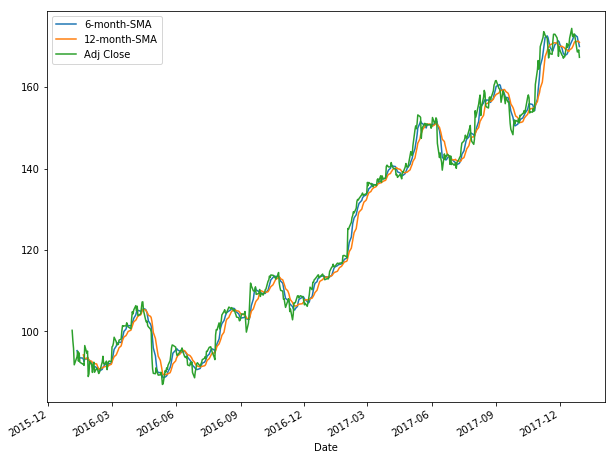

In [8]:
df[['6-month-SMA','12-month-SMA','Adj Close']].plot(figsize=(10,8))
plt.show()

In [9]:
# EWMA
df['EWMA-12'] = df['Adj Close'].ewm(span=12).mean()

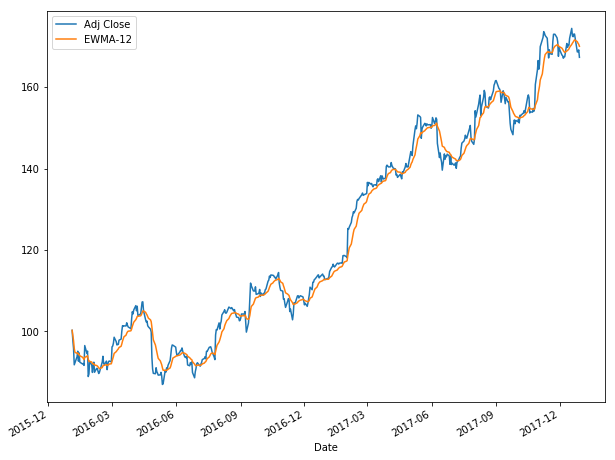

In [10]:
df[['Adj Close', 'EWMA-12']].plot(figsize=(10,8))
plt.show()

In [11]:
# ETS Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

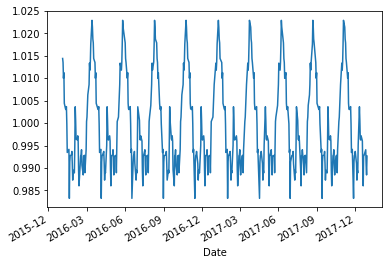

In [12]:
result = seasonal_decompose(df['Adj Close'], model='multiplicative', freq=52)
result.seasonal.plot()
plt.show()

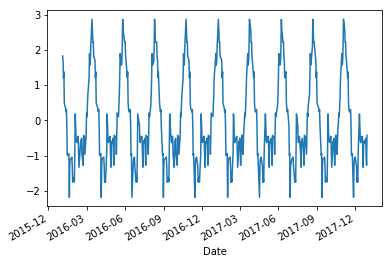

In [13]:
result = seasonal_decompose(df['Adj Close'], model='additive', freq=52)
result.seasonal.plot()
plt.show()

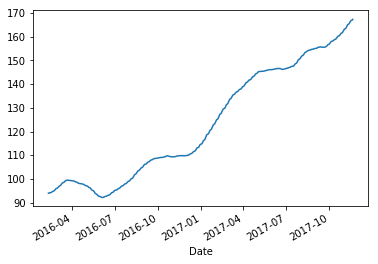

In [14]:
result.trend.plot()
plt.show()

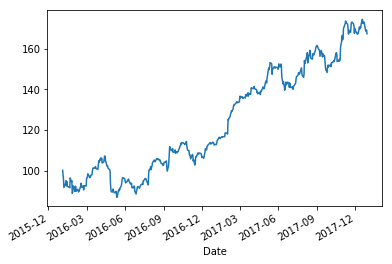

In [15]:
result.observed.plot()
plt.show()

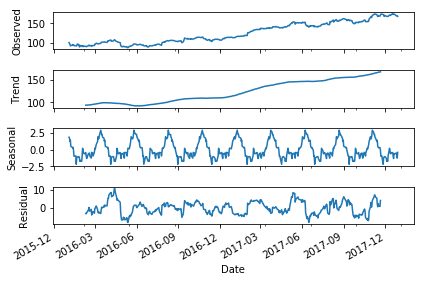

In [16]:
result.plot()
plt.show()

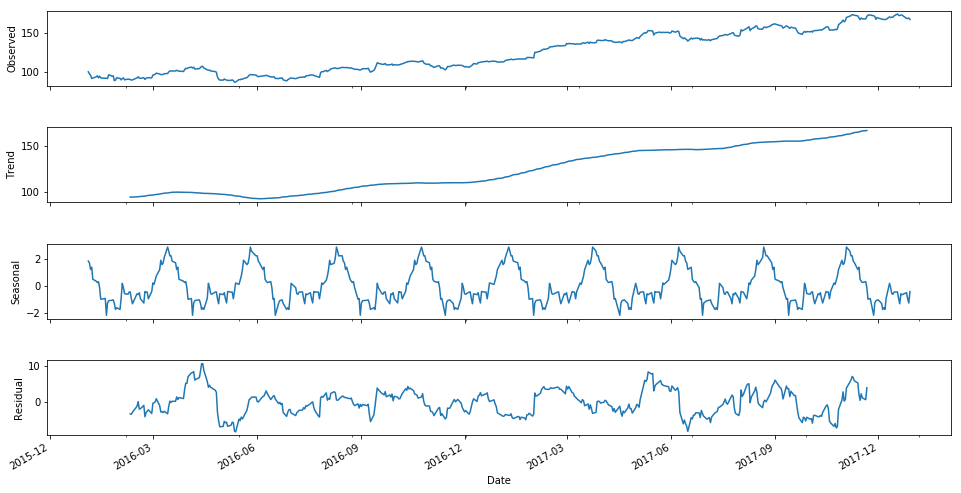

In [17]:
# Plot larger
fig = result.plot()
fig.set_size_inches(15,8)
plt.show()

In [18]:
df['12 Month Rolling Mean'] = df['Adj Close'].rolling(12).mean()
df['12 Month Rolling Std'] = df['Adj Close'].rolling(12).std()

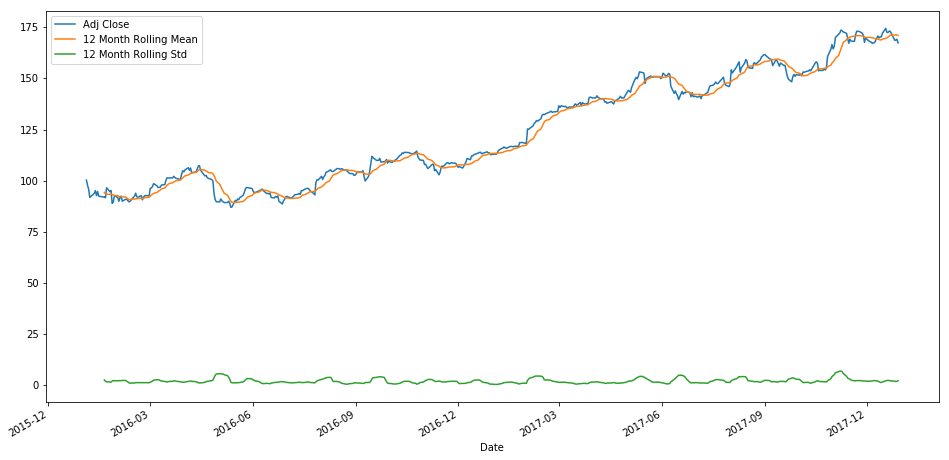

In [19]:
# Time Series
df[['Adj Close','12 Month Rolling Mean','12 Month Rolling Std']].plot(figsize=(16,8))
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
result1 = adfuller(df['Adj Close'])

In [22]:
result1

(-0.11576808952113374,
 0.9478451460794398,
 1,
 501,
 {'1%': -3.443470002903981,
  '10%': -2.569851849873108,
  '5%': -2.867326248740681},
 1763.5194817256813)

In [23]:
def adf_check(time_series):
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistic', 'p-value','# of lags','Num of Observations used']
    
    for value,label in zip(result,labels):
        print(label+ " : "+str(value))
        
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("Reject null hypothesis")
        print("Data has no unit root and is stationary")
        
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root and it is non-stationary")

In [24]:
adf_check(df['Adj Close'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -0.11576808952113374
p-value : 0.9478451460794398
# of lags : 1
Num of Observations used : 501
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and it is non-stationary


In [25]:
df['First Difference'] = df['Adj Close'] - df['Adj Close'].shift(1)

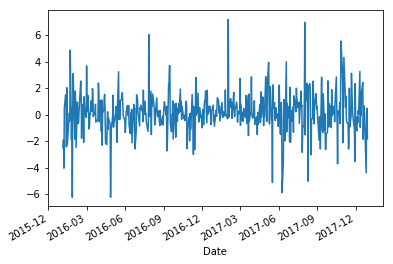

In [26]:
df['First Difference'].plot()
plt.show()

In [27]:
adf_check(df['First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -21.04539925660777
p-value : 0.0
# of lags : 0
Num of Observations used : 501
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [28]:
df['Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)

In [29]:
adf_check(df['Second Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -9.198100954331373
p-value : 2.0366536114220253e-15
# of lags : 15
Num of Observations used : 485
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


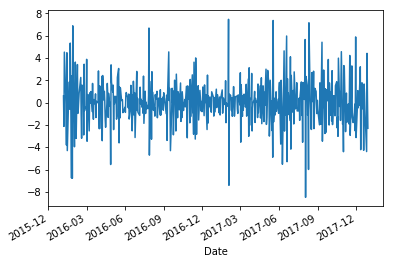

In [30]:
df['Second Difference'].plot()
plt.show()

In [31]:
df['Seasonal Difference'] = df['Adj Close'] - df['Adj Close'].shift(12)

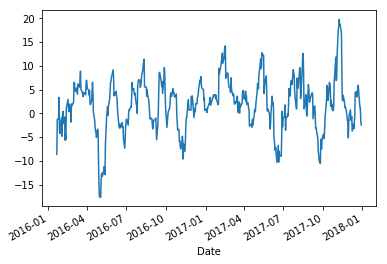

In [32]:
df['Seasonal Difference'].plot()
plt.show()

In [33]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -4.925772711271887
p-value : 3.106206574842781e-05
# of lags : 17
Num of Observations used : 473
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [34]:
df['First Seasonal Difference'] = df['First Difference'] - df['First Difference'].shift(12)

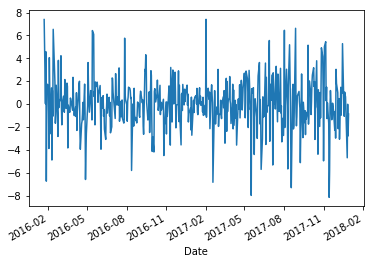

In [35]:
df['First Seasonal Difference'].plot()
plt.show()

In [36]:
adf_check(df['First Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -9.812689400170266
p-value : 5.602324704096988e-17
# of lags : 11
Num of Observations used : 478
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

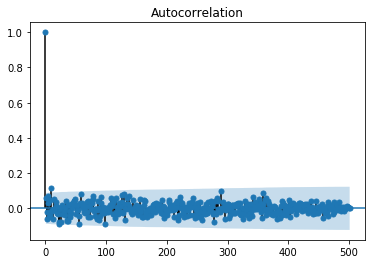

In [38]:
fig_first = plot_acf(df['First Difference'].dropna())
plt.show()

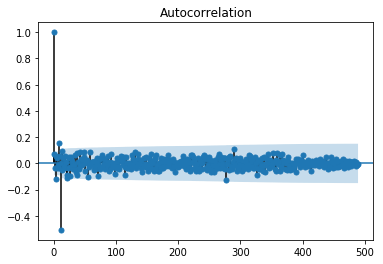

In [39]:
fig_first = plot_acf(df['First Seasonal Difference'].dropna())
plt.show()

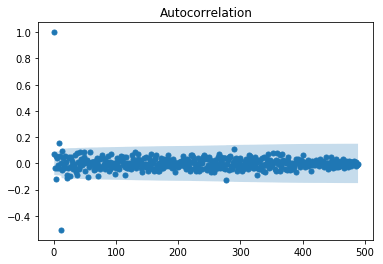

In [40]:
fig_first = plot_acf(df['First Seasonal Difference'].dropna(),use_vlines=False)
plt.show()

In [41]:
from pandas.plotting import autocorrelation_plot

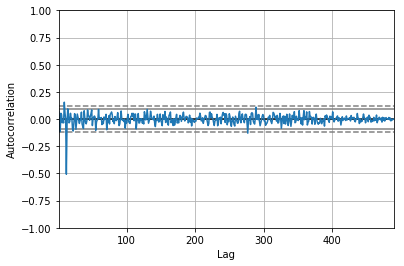

In [42]:
autocorrelation_plot(df['First Seasonal Difference'].dropna())
plt.show()

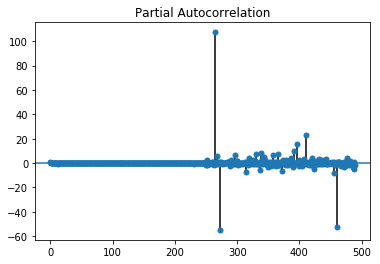

In [43]:
plot_pacf(df['First Seasonal Difference'].dropna())
plt.show()

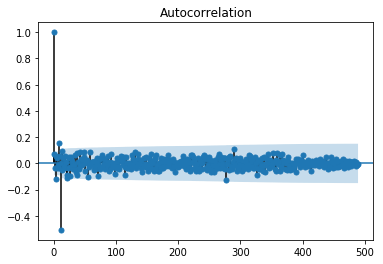

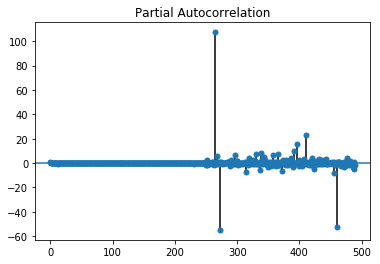

In [44]:
plot_acf(df['First Seasonal Difference'].dropna())
plot_pacf(df['First Seasonal Difference'].dropna())
plt.show()

In [45]:
from statsmodels.tsa.arima_model import ARIMA

In [46]:
model = sm.tsa.statespace.SARIMAX(df['Adj Close'], order=(0,1,0),seasonal_order=(1,1,1,12))

In [47]:
results = model.fit()

In [48]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Adj Close   No. Observations:                  503
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -930.954
Date:                            Sat, 29 Sep 2018   AIC                           1867.907
Time:                                    17:59:18   BIC                           1880.491
Sample:                                         0   HQIC                          1872.849
                                            - 503                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0856      0.051     -1.682      0.092      -0.185       0.014
ma.S.L12      -0.9365      0.029   

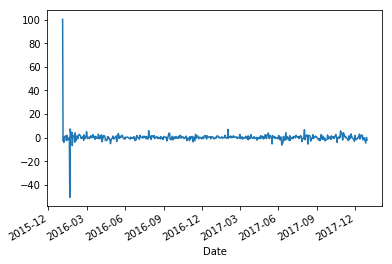

In [49]:
results.resid.plot()
plt.show()

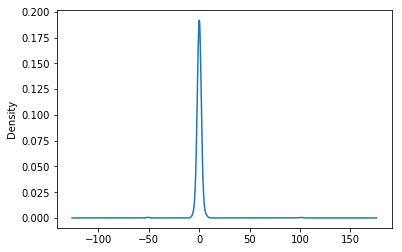

In [50]:
results.resid.plot(kind='kde')
plt.show()

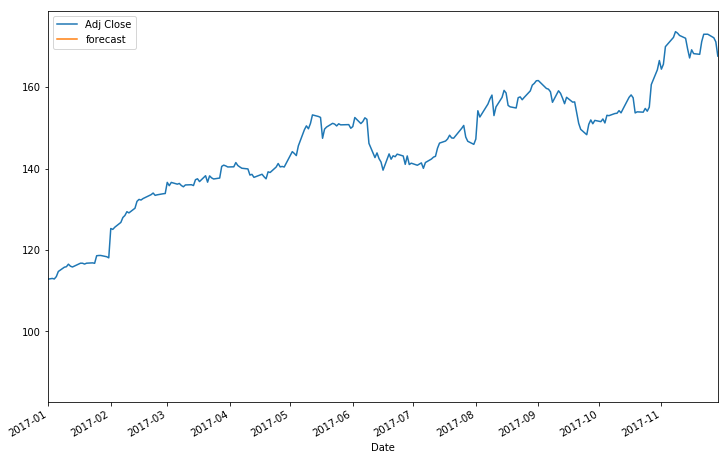

In [51]:
df['forecast'] = results.predict(start=100, end=1000)
df[['Adj Close','forecast']].plot(xlim=['2017-01-01', '2017-11-29'],figsize=(12,8))
plt.show()

In [52]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,6-month-SMA,12-month-SMA,EWMA-12,12 Month Rolling Mean,12 Month Rolling Std,First Difference,Second Difference,Seasonal Difference,First Seasonal Difference,forecast
Date,,,,,,,,,,,,,,,,
2017-12-22,174.679993,175.419998,174.500000,175.009995,173.023026,16114600,172.897789,171.105867,171.603438,171.105867,2.200831,0.000000,-0.652512,5.931885,0.622833,NaN
2017-12-26,170.800003,171.470001,169.679993,170.570007,168.633423,33185500,172.337558,171.208850,171.146513,171.208850,2.034138,-4.389603,-4.389603,1.235794,-4.696091,NaN
2017-12-27,170.100006,170.779999,169.710007,170.600006,168.663101,21498200,171.378573,171.310188,170.764450,171.310188,1.851811,0.029678,4.419281,1.216064,-0.019730,NaN
2017-12-28,171.000000,171.850006,170.479996,171.080002,169.137650,16480200,170.808457,171.179193,170.514173,171.179193,1.951096,0.474549,0.444871,-1.571945,-2.788009,NaN
2017-12-29,170.520004,170.589996,169.220001,169.229996,167.308640,25884400,169.964811,170.975697,170.021014,170.975697,2.222159,-1.829010,-2.303559,-2.441955,-0.870010,NaN
